## Q1. Import the necessary libraries

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
from matplotlib.cbook import boxplot_stats
import scipy.stats as stats
from scipy.stats import chi2_contingency

## Q2. Read the data as a data frame

In [2]:
df = pd.read_csv("/Users/sanidhyavishnoi/Study_GL/lab/p1/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Q3a. Shape of the data

In [3]:
df.shape

(1338, 7)

## Q3b. Data type of each attribute

In [4]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

## Q3c. Checking the presence of missing values

In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

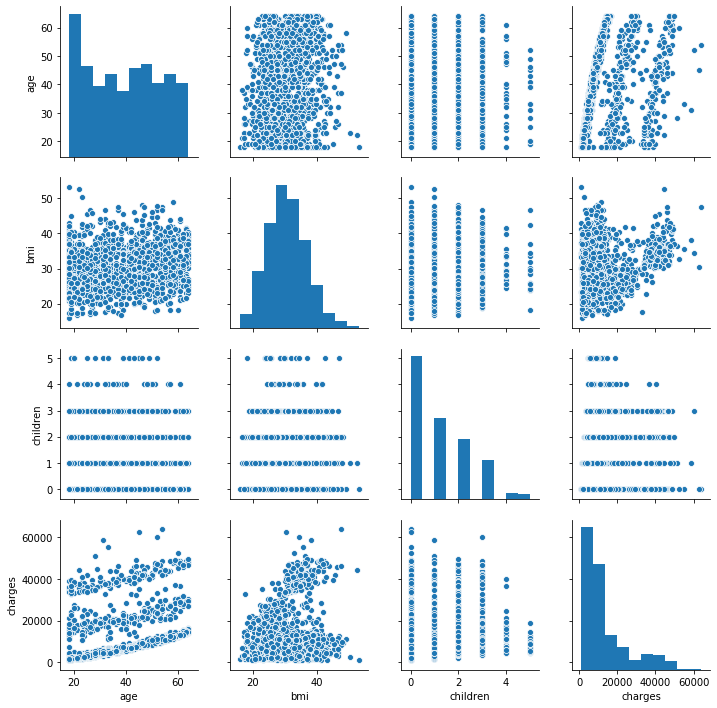

In [7]:
sns.pairplot(df)

## Q3d. 5 point summary of numerical attributes

In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Q3e. Distribution of ‘bmi’, ‘age’ and ‘charges’ columns.

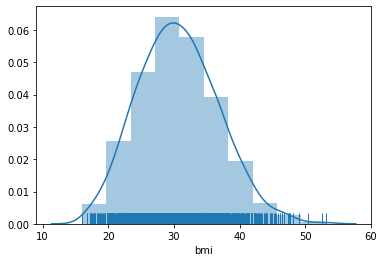

In [7]:
sns.distplot(df['bmi'],rug =True,bins =10)

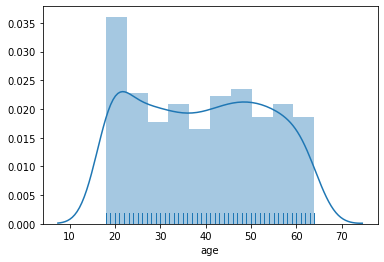

In [8]:
sns.distplot(df['age'],rug =True, bins=10)

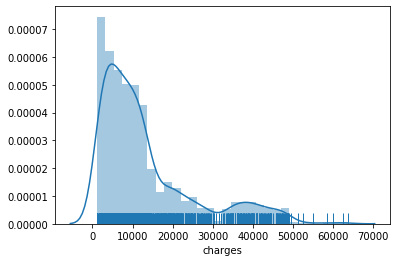

In [9]:
sns.distplot(df['charges'],rug =True)

## Q3f. Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns

In [10]:
skewbmi = df['bmi'].skew()
print('Skewness in BMI :', skewbmi , ', Skewness > 0 : Left Skewed')

Skewness in BMI : 0.2840471105987448 , Skewness > 0 : Left Skewed


In [11]:
skewage = df['age'].skew()
print('Skewness in Age :', skewage , ', Skewness > 0 : Left Skewed')

Skewness in Age : 0.05567251565299186 , Skewness > 0 : Left Skewed


In [12]:
skewch = df['charges'].skew()
print('Skewness in Charges :', skewch , ', Skewness > 0 : Left Skewed')

Skewness in Charges : 1.5158796580240388 , Skewness > 0 : Left Skewed


## Q3g. Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns

[49.06, 48.07, 47.52, 47.41, 50.38, 47.6, 52.58, 47.74, 53.13]

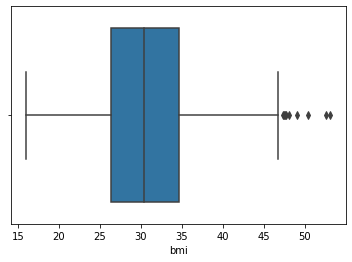

In [13]:
outliers = [y for stat in boxplot_stats(df['bmi']) for y in stat['fliers']]
bmi_bx = sns.boxplot(x = df['bmi'])
outliers

[]

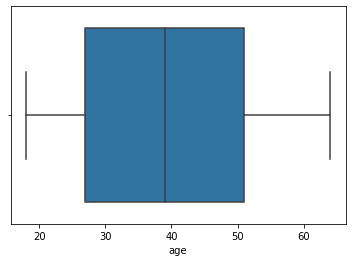

In [14]:
outliers = [y for stat in boxplot_stats(df['age']) for y in stat['fliers']]
bmi_bx = sns.boxplot(x = df['age'])
outliers

[39611.7577,
 36837.467000000004,
 37701.8768,
 38711.0,
 35585.576,
 51194.55914,
 39774.2763,
 48173.361,
 38709.176,
 37742.5757,
 47496.49445,
 37165.1638,
 39836.519,
 43578.9394,
 47291.055,
 47055.5321,
 39556.4945,
 40720.55105,
 36950.2567,
 36149.4835,
 48824.45,
 43753.33705,
 37133.8982,
 34779.615,
 38511.6283,
 35160.13457,
 47305.305,
 44260.7499,
 41097.16175,
 43921.1837,
 36219.40545,
 46151.1245,
 42856.837999999996,
 48549.17835,
 47896.79135,
 42112.2356,
 38746.3551,
 42124.5153,
 34838.873,
 35491.64,
 42760.5022,
 47928.03,
 48517.56315,
 41919.097,
 36085.219,
 38126.2465,
 42303.69215,
 46889.2612,
 46599.1084,
 39125.33225,
 37079.372,
 35147.52848,
 48885.135610000005,
 36197.699,
 38245.59327,
 48675.5177,
 63770.42801,
 45863.205,
 39983.42595,
 45702.02235,
 58571.074479999996,
 43943.8761,
 39241.442,
 42969.8527,
 40182.246,
 34617.84065,
 42983.4585,
 42560.4304,
 40003.33225,
 45710.20785,
 46200.9851,
 46130.5265,
 40103.89,
 34806.4677,
 40273.6455,

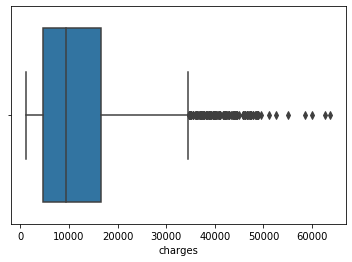

In [15]:
outliers = [y for stat in boxplot_stats(df['charges']) for y in stat['fliers']]
bmi_bx = sns.boxplot(x = df['charges'])
outliers

## Q3h. Distribution of categorical columns (include children)

,age,bmi,children,smoker,region,charges
sex,,,,,,
female,662,662,662,662,662,662
male,676,676,676,676,676,676


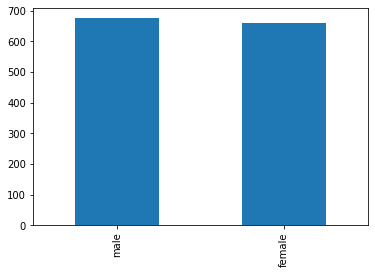

In [16]:
df['sex'].value_counts().plot(kind='bar')
df.groupby('sex').count()

,age,sex,bmi,smoker,region,charges
children,,,,,,
0,574,574,574,574,574,574
1,324,324,324,324,324,324
2,240,240,240,240,240,240
3,157,157,157,157,157,157
4,25,25,25,25,25,25
5,18,18,18,18,18,18


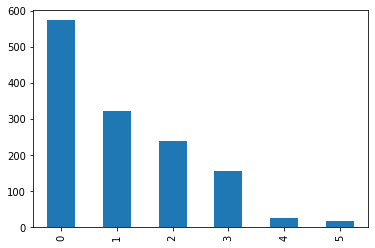

In [17]:
df['children'].value_counts().plot(kind='bar')
df.groupby('children').count()

,age,sex,bmi,children,region,charges
smoker,,,,,,
no,1064,1064,1064,1064,1064,1064
yes,274,274,274,274,274,274


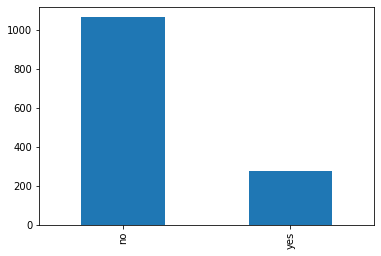

In [18]:
df['smoker'].value_counts().plot(kind='bar')
df.groupby('smoker').count()

,age,sex,bmi,children,smoker,charges
region,,,,,,
northeast,324,324,324,324,324,324
northwest,325,325,325,325,325,325
southeast,364,364,364,364,364,364
southwest,325,325,325,325,325,325


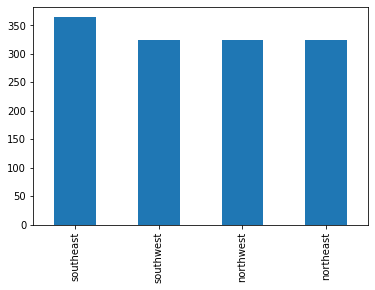

In [19]:
df['region'].value_counts().plot(kind='bar')
df.groupby('region').count()

## Q3i. Pair-plot that includes all the columns of the dataframe

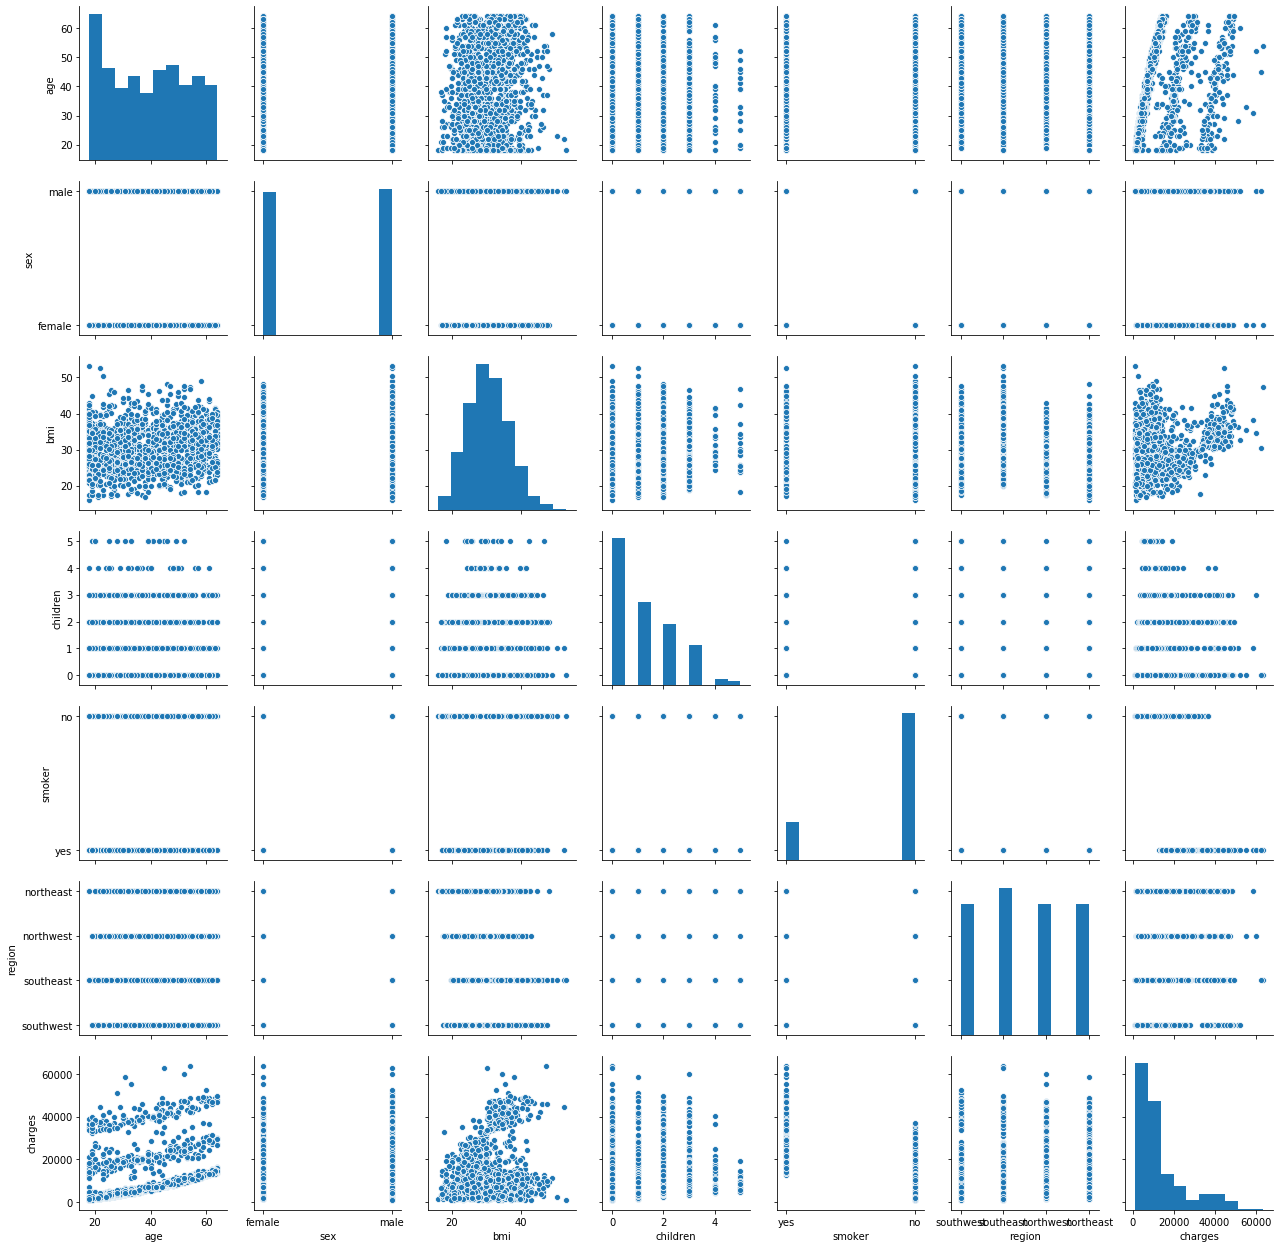

In [20]:
sns.pairplot(df,vars=df.columns)

## Q4a. Do charges of people who smoke differ significantly from the people who don't?

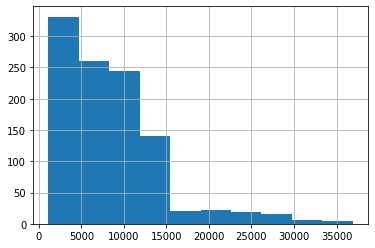

In [27]:
non_smoking = df[df['smoker']== 'no']
nosm_ch=non_smoking['charges']
nosm_ch.hist()

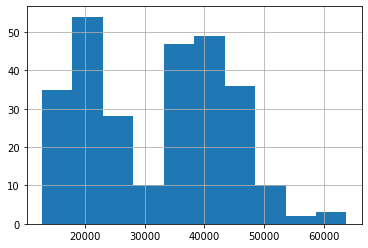

In [28]:
smoking = df[df['smoker']== 'yes']
sm_ch=smoking['charges']
sm_ch.hist()

In [29]:
print(stats.ttest_ind(nosm_ch,sm_ch,equal_var =False) ,' \n\nAs P Value is less than 0.05.\nWe REJECT null Hypothesis : Charges are same for Smoker and Non Smoker.'
      '\nACCEPT Alternate Hypothesis : Charges Differ Significantly for Smoker and Non Smoker.')

Ttest_indResult(statistic=-32.751887766341824, pvalue=5.88946444671698e-103)  

As P Value is less than 0.05.
We REJECT null Hypothesis : Charges are same for Smoker and Non Smoker.
ACCEPT Alternate Hypothesis : Charges Differ Significantly for Smoker and Non Smoker.


## Q4b. Does bmi of males differ significantly from that of females?

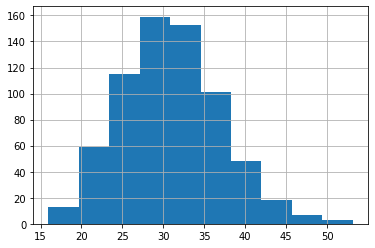

In [30]:
males = df[df['sex'] == 'male']
bmi_males = males['bmi']
bmi_males.hist()

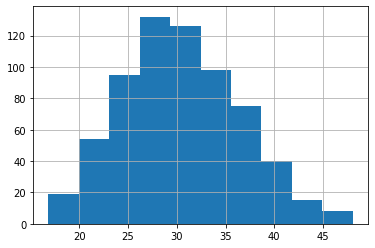

In [31]:
females = df[df['sex'] == 'female']
bmi_females = females['bmi']
bmi_females.hist()

In [32]:
print(stats.ttest_ind(bmi_males,bmi_females,equal_var =False) ,' \n\nAs P Value is higher than 0.05.\nWe ACCEPT null Hypothesis : BMI are same for Males and Females.'
      '\nREJECT Alternate Hypothesis : BMI Differ Significantly for Males and Females.')

Ttest_indResult(statistic=1.697027933124022, pvalue=0.08992430667834876)  

As P Value is higher than 0.05.
We ACCEPT null Hypothesis : BMI are same for Males and Females.
REJECT Alternate Hypothesis : BMI Differ Significantly for Males and Females.


## Q4c. Is the proportion of smokers significantly different in different genders?

In [33]:
prop = pd.crosstab(df['sex'],df['smoker'])
prop

smoker,no,yes
sex,,
female,547,115
male,517,159


In [34]:
chi2 , p ,dof ,ex = chi2_contingency(prop)
print('Chi-square value : ',chi2)
print('P-Value : ',p)
print(' \n\nAs P Value is less than 0.05.\nWe REJECT null Hypothesis : Proportion of smokers is same in different genders.'
      '\nACCEPT Alternate Hypothesis : Proportion of smokers is significantly different in different genders.')

Chi-square value :  7.39291081459996
P-Value :  0.006548143503580696
 

As P Value is less than 0.05.
We REJECT null Hypothesis : Proportion of smokers is same in different genders.
ACCEPT Alternate Hypothesis : Proportion of smokers is significantly different in different genders.


## Q4d. Is the distribution of bmi across women with no children, one child and two children, the same ?

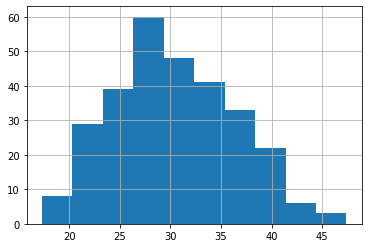

In [35]:
females = df[df['sex'] == 'female']
females0 = females[females['children'] == 0 ]
bmi_females0 = females0['bmi']
bmi_females0.hist()

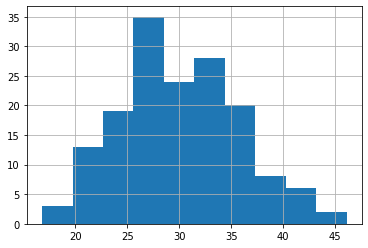

In [36]:
females1 = females[females['children'] == 1 ]
bmi_females1 = females1['bmi']
bmi_females1.hist()

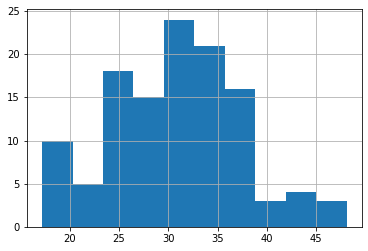

In [37]:
females2 = females[females['children'] == 2 ]
bmi_females2 = females2['bmi']
bmi_females2.hist()

In [38]:

print(stats.f_oneway(bmi_females0,bmi_females1,bmi_females2),' \n\nAs P Value is higher than 0.05.\nWe ACCEPT null Hypothesis : BMI of women with no children, one child and two children are same.'
      '\nREJECT Alternate Hypothesis : BMI of women with no children, one child and two children are different.\n\n\n\t\t\t\t\t      **** THE END ****')

F_onewayResult(statistic=0.3344720147757968, pvalue=0.7158579926754841)  

As P Value is higher than 0.05.
We ACCEPT null Hypothesis : BMI of women with no children, one child and two children are same.
REJECT Alternate Hypothesis : BMI of women with no children, one child and two children are different.


					      **** THE END ****
